In [ ]:
#데이터 임포트
from pandas import Series,DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


titanic=pd.read_csv("C:/Users/Affinity/Desktop/lecture/titanic.csv",header=0,index_col=None,encoding='utf-8')
titanic["Survived"]= titanic["Survived"].astype(object)
titanic["Pclass"]= titanic["Pclass"].astype(object)

missing_df=titanic.isnull().sum().reset_index()
missing_df.columns= ['column','count']
missing_df['ratio']=missing_df['count'] / titanic.shape[0]
missing_df.loc[missing_df['ratio'] !=0 ]

titanic['Survived'].value_counts().plot(kind='bar')
plt.show()

category_feature=[col for col in titanic.columns if titanic[col].dtype=="object"]



category_feature=list(set(category_feature)-set(['Survived']))
category_feature

for col in category_feature:
    titanic[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()
    


In [ ]:
sex_df=titanic.groupby(['Sex','Survived'])['Survived'].count().unstack('Survived')

sex_df.plot(kind='bar',figsize=(20,10))
plt.show()


In [ ]:

numerical_feature= list(set(titanic.columns)-set(category_feature)
                       -set(['Passengerld','Survived']))

numerical_feature= np.sort(numerical_feature)
numerical_feature


In [ ]:

for col in numerical_feature:
    sns.distplot(titanic.loc[titanic[col].notnull(),col])
    plt.title(col)
    plt.show()

In [ ]:
sns.pairplot(titanic[list(numerical_feature)+['Survived']],hue="Survived",
            x_vars=numerical_feature,y_vars=numerical_feature)


plt.show()

In [ ]:
# ppt 94

import pandas as pd
import numpy as np

#훈련 데이터, 테스트 데이터 읽어옴

trn=pd.read_csv('C:/Users/Affinity/Desktop/lecture/ssd_train.csv', na_values=['-1','-1.0'])
tst=pd.read_csv('C:/Users/Affinity/Desktop/lecture/ssd_test.csv', na_values=['-1','-1.0'])

print(trn.shape, tst.shape)

trn.head()
trn.info()


In [ ]:
#변수의 최대값 ,최소값 확인
trn.describe()
#변수의 결측값 확인
trn.isnull().sum(axis=0)
tst.isnull().sum(axis=0)




In [ ]:
np.unique(trn['target'])



In [ ]:


1.0*sum(trn['target'])/trn.shape[0]



In [ ]:
# 훈련 데이터와 테스트 데이터 통합
tst['target']=np.nan
df=pd.concat([trn,tst],axis=0)

# 시각화 관련 라이브러리 불러옴
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#시각화 관련 함수 미리 정의
def bar_plot(col,data,hue=None):
    f,ax= plt.subplots(figsize=(10,5))
    sns.countplot(x=col, hue=hue, data=data,alpha=0.5)
    plt.show()
    
def dist_plot(col,data):
    f,ax= plt.subplots(figsize=(10,5))
    sns.distplot(data[col].dropna(),kde=False,bins=10)
    plt.show()
    
def bar_plot_ci(col,data):
    f,ax= plt.subplots(figsize=(10,5))
    sns.barplot(x=col,y='target',data=data)
    plt.show()

#분석 편의를 위해 변수 유형별 구분
#이진 변수

binary=['ps_ind_06_bin','ps_ind_07_bin','ps_ind_08_bin','ps_ind_09_bin',
        'ps_ind_10_bin','ps_ind_11_bin','ps_ind_12_bin','ps_ind_13_bin',
        'ps_ind_16_bin','ps_ind_17_bin','ps_ind_18_bin','ps_calc_15_bin',
        'ps_calc_16_bin','ps_calc_17_bin','ps_calc_18_bin','ps_calc_19_bin',
        'ps_calc_20_bin']

#범주형 변수
category=['ps_ind_02_cat','ps_ind_04_cat','ps_ind_05_cat','ps_car_01_cat',
        'ps_car_02_cat','ps_car_03_cat','ps_car_04_cat','ps_car_05_cat',
        'ps_car_06_cat','ps_car_07_cat','ps_car_08_cat','ps_car_09_cat',
        'ps_car_10_cat','ps_car_11_cat']

integer=['ps_ind_01','ps_ind_03','ps_ind_14','ps_ind_15','ps_calc_04',
         'ps_calc_05','ps_calc_06','ps_calc_07','ps_calc_08','ps_calc_09',
         'ps_calc_10','ps_calc_11','ps_calc_12','ps_calc_13','ps_calc_14',
         'ps_calc_11']



floats=['ps_reg_01','ps_reg_02','ps_reg_03','ps_calc_01','ps_calc_02',
       'ps_calc_03','ps_car_12','ps_car_13','ps_car_14','ps_car_15']

for col in binary + category + integer:
    bar_plot(col,df)
    
  

In [ ]:
## ----------------p646 변수간 상관관계(시각화)

#전체 데이터에 대한 상관관계 Heatmap 시각화
corr=df.corr()
cmap=sns.color_palette("Blues")
f,ax= plt.subplots(figsize=(10,7))
sns.heatmap(corr,cmap=cmap)

#일부 변수만 선별

features=['ps_ind_06_bin','ps_ind_07_bin','ps_ind_08_bin','ps_ind_09_bin',
        'ps_ind_12_bin','ps_ind_13_bin','ps_ind_16_bin','ps_ind_17_bin',
         'ps_ind_18_bin','ps_ind_02_cat','ps_ind_04_cat','ps_ind_05_cat',
         'ps_car_01_cat','ps_car_02_cat','ps_car_03_cat','ps_car_04_cat',
         'ps_car_05_cat','ps_car_06_cat','ps_car_07_cat','ps_car_08_cat',
         'ps_car_09_cat','ps_car_11_cat','ps_ind_01','ps_ind_03',
         'ps_ind_14','ps_ind_15','ps_ind_01','ps_ind_03',
         'ps_ind_14','ps_ind_15','ps_car_11','ps_reg_01','ps_reg_02',
         'ps_reg_03','ps_car_12','ps_car_13','ps_car_14','ps_car_15']

corr_sub=df[features].corr()
f,ax=plt.subplots(figsize=(10,7))
sns.heatmap(corr_sub,cmap=cmap)

#p647   단일변수 vs 타겟 변수

for col in(binary+category+integer):
    bar_plot_ci(col,df)
    
df['is_tst']=df['target'].isnull()
for col in binary + category + ingeter:
    bar_plot(col,df,'is_tst')  

# p666 Bagging

In [1]:
#----------------p666 Bagging

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X,y=make_moons(n_samples=500,noise=0.25,random_state=3)
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y, random_state=42)

bag_clf=BaggingClassifier(
DecisionTreeClassifier(),n_estimators=500,
max_samples=100,bootstrap=True,n_jobs=-1)

bag_clf.fit(X_train,y_train)
y_pred=bag_clf.predict(X_test)

dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
dt_y_pred=dt_clf.predict(X_test)

print(y_pred)
print("\n",dt_y_pred)
print(y_pred== dt_y_pred)

#oob 평가

bag_clf=BaggingClassifier(
DecisionTreeClassifier(),n_estimators=500,
bootstrap=True,n_jobs=-1, oob_score=True)

bag_clf.fit(X_train,y_train)


from sklearn.metrics import accuracy_score
y_pred=bag_clf.predict(X_test)


accuracy_score(y_test,y_pred)


#p668 배깅 분류기에 있는 결정트리의 결정 경계 시각화

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

Xm,ym=make_moons(n_samples=100,noise=0.25,random_state=3)
Xm_train,Xm_test,ym_train,ym_test=train_test_split(Xm,ym,stratify=ym,random_state=42)

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging=BaggingClassifier(DecisionTreeClassifier(),n_estimators=5,n_jobs=-1,random_state=42)
bagging.fit(Xm_train,ym_train)

import matplotlib.pyplot as plt
import mglearn

fig,axes= plt.subplots(2,3,figsize=(20,10))

for i,(ax,tree) in enumerate(zip(axes.ravel(),bagging.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(Xm,ym,tree,ax=ax)
    
mglearn.plots.plot_2d_separator(bagging,Xm,fill=True,ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title("Bagging")
mglearn.discrete_scatter(Xm[:,0],Xm[:,1],ym)



plt.show()



[1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1
 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1
 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 0
 1 1 0 1 0 1 1 0 0 0 0 1 0 1]

 [1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1
 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0
 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 0
 1 1 0 1 0 1 1 0 0 0 0 1 0 1]
[ True  True  True False  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True False  True  True  True  True  

<Figure size 2000x1000 with 6 Axes>

In [2]:
bag_clf.oob_score_


0.9333333333333333

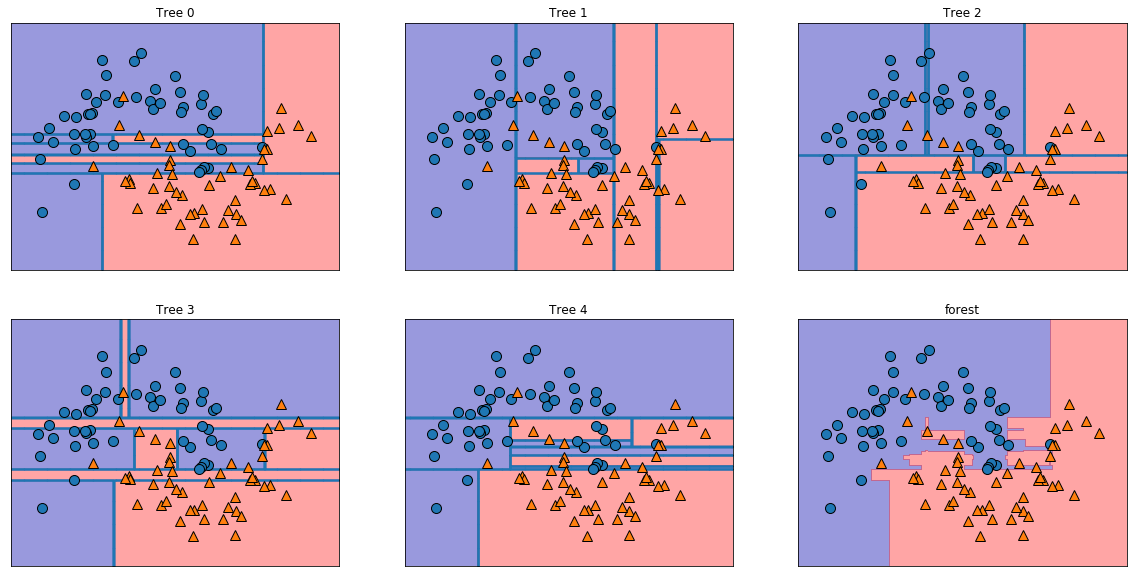

In [3]:
# 배깅과 랜덤 포레스트 비교
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

Xm,ym=make_moons(n_samples=100,noise=0.25,random_state=3)
Xm_train,Xm_test,ym_train,ym_test=train_test_split(Xm,ym,stratify=ym,random_state=3)

forest=RandomForestClassifier(n_estimators=5,max_features=1, random_state=2)
forest.fit(Xm_train,ym_train)

fig,axes= plt.subplots(2,3,figsize=(20,10))

for i,(ax,tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(Xm,ym,tree,ax=ax)
    

mglearn.plots.plot_2d_separator(forest,Xm,fill=True,ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title("forest")
mglearn.discrete_scatter(Xm[:,0],Xm[:,1],ym)
plt.show()


sepal length (cm) = 0.048606135318817786
sepal width (cm) = 0.018976125702578443
petal length (cm) = 0.4867579747019965
petal width (cm) = 0.44565976427660725


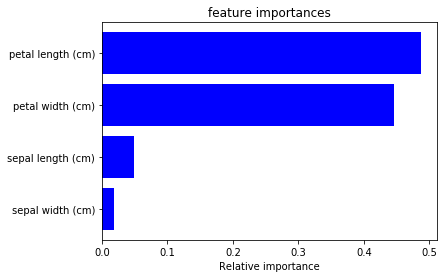

In [4]:
#p674 랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
iris=load_iris()
rnd_clf=RandomForestClassifier(n_estimators=5,n_jobs=-1, random_state=42)
rnd_clf.fit(iris["data"],iris["target"])

for name,importance in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, "=", importance)
    
import numpy as np

features = iris['feature_names']
importances= rnd_clf.feature_importances_
indices=np.argsort(importances)


plt.title('feature importances')
plt.barh(range(len(indices)),importances[indices],color='b',align='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()

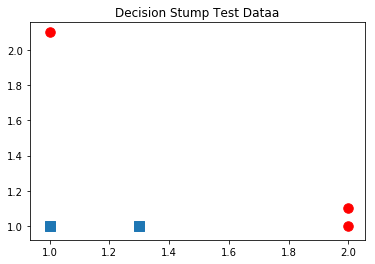

split : dim 0 , thresh 0.9 , 
 thresh ineqal: it, the weighted error is [[0.4]]  

split : dim 0 , thresh 0.9 , 
 thresh ineqal: gt, the weighted error is [[0.6]]  

split : dim 0 , thresh 1.0 , 
 thresh ineqal: it, the weighted error is [[0.4]]  

split : dim 0 , thresh 1.0 , 
 thresh ineqal: gt, the weighted error is [[0.6]]  

split : dim 0 , thresh 1.1 , 
 thresh ineqal: it, the weighted error is [[0.4]]  

split : dim 0 , thresh 1.1 , 
 thresh ineqal: gt, the weighted error is [[0.6]]  

split : dim 0 , thresh 1.2 , 
 thresh ineqal: it, the weighted error is [[0.4]]  

split : dim 0 , thresh 1.2 , 
 thresh ineqal: gt, the weighted error is [[0.6]]  

split : dim 0 , thresh 1.3 , 
 thresh ineqal: it, the weighted error is [[0.2]]  

split : dim 0 , thresh 1.3 , 
 thresh ineqal: gt, the weighted error is [[0.8]]  

split : dim 0 , thresh 1.4 , 
 thresh ineqal: it, the weighted error is [[0.2]]  

split : dim 0 , thresh 1.4 , 
 thresh ineqal: gt, the weighted error is [[0.8]]  

spli

({'dim': 0, 'thresh': 1.3, 'ineq': 'it'}, matrix([[0.2]]), array([[-1.],
        [ 1.],
        [-1.],
        [-1.],
        [ 1.]]))

In [5]:
#p679  의사결정 스텀프( weak classifier)
from numpy import *

#그래프



xcord0=[]
ycord0=[]
xcord1=[]
ycord1=[]




def loadSimpData():
    dataMat= matrix([[1.,2.1],
                    [2.,1.1],
                    [1.3,1.],
                    [1.,1.],
                    [2,1.]])
    classLabels=[1.0,1.0,-1.0,-1.0,1.0]
    return dataMat,classLabels
dataMat, classLabels= loadSimpData()

for i in range(len(classLabels)):
    if classLabels[i]==1.0:
        xcord1.append(dataMat[i,0]),ycord1.append(dataMat[i,1])
    else:
        xcord0.append(dataMat[i,0]), ycord0.append(dataMat[i,1])
        
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(xcord0,ycord0,marker='s',s=90)
ax.scatter(xcord1,ycord1,marker='o',s=90,c='red')

plt.title('Decision Stump Test Dataa')
plt.show()



#스텀프 함수 이용 분류기

def stumpClassify(dataMatrix,dimen,threshVal,threshlneq):
    retArray=ones((shape(dataMatrix)[0],1))
    
    if threshlneq =='it':
        retArray[dataMatrix[:,dimen] <= threshVal] = -1.0
    
    else:
        retArray[dataMatrix[:,dimen] > threshVal] = -1.0
   
   
    return retArray

#------------의사결정 스텀프 생성함수

def buildStump(dataArr,classLabels,D):
    dataMatrix= mat(dataArr); labelMat=mat(classLabels).T
    m,n=shape(dataMatrix)
    numSteps=10.0 ; bestStump= {} ; bestClasEst = mat(zeros((m,1)))
    minError= inf  
    
    for i in range(n):
        rangeMin=dataMatrix[:,i].min(); rangeMax=dataMatrix[:,i].max();
        stepSize=(rangeMax-rangeMin)/numSteps
        
        for j in range(-1,int(numSteps)+1):
            for inequal in ['it','gt']:
                threshVal=(rangeMin + float(j) * stepSize )
                
               
                predictedVals=stumpClassify(dataMatrix,i,threshVal,inequal)
               
                errArr=mat(ones((m,1)))
                
                errArr[predictedVals == labelMat] = 0
                
                weightedError= D.T*errArr

                
            
                print("split : dim {} , thresh {} , \n thresh ineqal: {}, the weighted error is {}  \n"
                      .format(i, threshVal, inequal, weightedError) )
                
                if weightedError < minError:
                    minError=weightedError
                    bestClasEst= predictedVals.copy()
                    bestStump['dim']= i 
                    bestStump['thresh']= threshVal
                    bestStump['ineq']= inequal
              
    return bestStump,minError,bestClasEst
                
D= mat(ones((5,1))/5)
buildStump(dataMat,classLabels,D)



split : dim 0 , thresh 0.9 , 
 thresh ineqal: it, the weighted error is [[0.4]]  

split : dim 0 , thresh 0.9 , 
 thresh ineqal: gt, the weighted error is [[0.6]]  

split : dim 0 , thresh 1.0 , 
 thresh ineqal: it, the weighted error is [[0.4]]  

split : dim 0 , thresh 1.0 , 
 thresh ineqal: gt, the weighted error is [[0.6]]  

split : dim 0 , thresh 1.1 , 
 thresh ineqal: it, the weighted error is [[0.4]]  

split : dim 0 , thresh 1.1 , 
 thresh ineqal: gt, the weighted error is [[0.6]]  

split : dim 0 , thresh 1.2 , 
 thresh ineqal: it, the weighted error is [[0.4]]  

split : dim 0 , thresh 1.2 , 
 thresh ineqal: gt, the weighted error is [[0.6]]  

split : dim 0 , thresh 1.3 , 
 thresh ineqal: it, the weighted error is [[0.2]]  

split : dim 0 , thresh 1.3 , 
 thresh ineqal: gt, the weighted error is [[0.8]]  

split : dim 0 , thresh 1.4 , 
 thresh ineqal: it, the weighted error is [[0.2]]  

split : dim 0 , thresh 1.4 , 
 thresh ineqal: gt, the weighted error is [[0.8]]  

spli

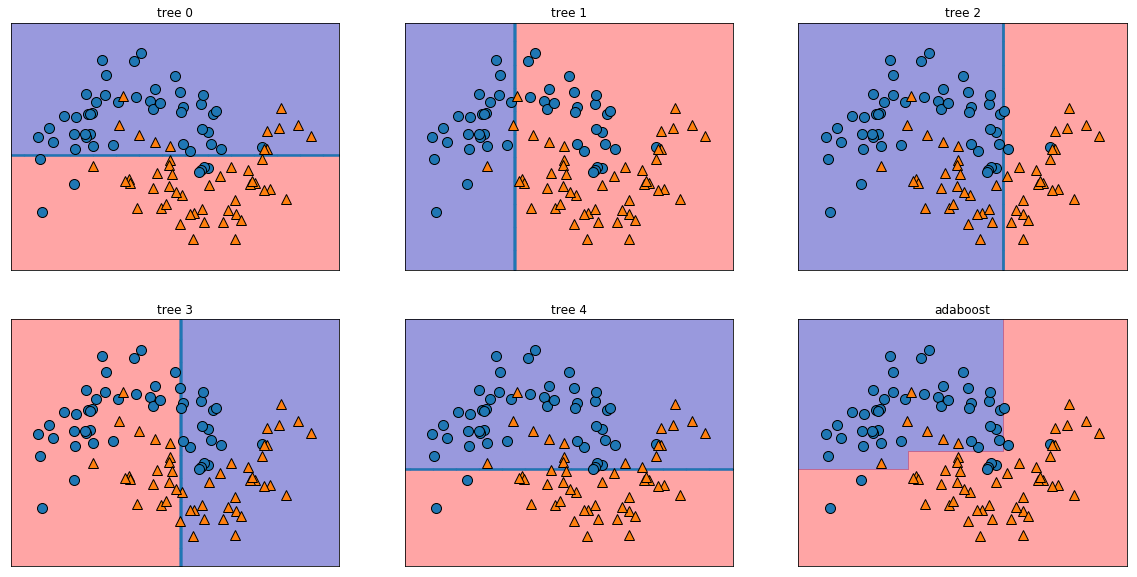

In [6]:
# p681 의사결정 스텀프로 Adaboost 학습 구현

def adaBoostTrainDs(dataArr,classLabels,numIt=40):
    weakClassArr=[]
    m=shape(dataArr)[0]
  
    D=mat(ones((m,1))/m)

    aggClassEst=mat(zeros((m,1)))
    
    for i in range(numIt):
        bestStump,error,classEst= buildStump(dataArr,classLabels,D)
        
        print("D : {} " .format(D.T))
        
        alpha= float(0.5*log((1.0-error)/ max(error,1e-16)))
        bestStump['alpha']=alpha
        weakClassArr.append(bestStump)
        print("classEst : {} ".format(classEst.T))
        
        expon=multiply(-1*alpha*mat(classLabels).T, classEst)
     
        D=multiply(D,exp(expon))
        D=D/D.sum()

        
        aggClassEst += alpha*classEst
        print("aggClassEst: {}".format(aggClassEst.T))
        
        aggErrors=multiply(sign(aggClassEst) != mat(classLabels).T,ones((m,1)))
        errorRate=aggErrors.sum()/m
        
        print("total error : {}".format(errorRate))
        
        if errorRate == 0.0: break
    return weakClassArr

adaBoostTrainDs(dataMat,classLabels,9)

#--------------------의사결ㄹ정 스텀프로 AdaBoost 검사 구현


def adaClassify(datToClass,classifierArr):
    dataMatrix=mat(datToClass)
    m=shape(dataMatrix)[0]
    aggClassEst= mat(zeros((m,1)))
    for i in range(len(classifierArr)):
        classEst=stumpClassify(dataMatrix,classifierArr[i]['dim'], classifierArr[i]['thresh'],
                              classifierArr[i]['ineq'])
        
        
        aggClassEst += classifierArr[i]['alpha']*classEst
        
        print (aggClassEst)
    
    return sign(aggClassEst)

classifierArr= adaBoostTrainDs(dataMat,classLabels,30)

adaClassify([0,0] ,classifierArr)

from sklearn.ensemble import AdaBoostClassifier

ada=AdaBoostClassifier(n_estimators=5, random_state=42)
ada.fit(Xm_train,ym_train)

fig,axes = plt.subplots(2,3,figsize=(20,10))

for i, (ax,tree) in enumerate(zip(axes.ravel(),ada.estimators_)):
    ax.set_title('tree {}'.format(i))
    
    mglearn.plots.plot_tree_partition(Xm,ym,tree,ax=ax)
    
mglearn.plots.plot_2d_separator(ada,Xm,fill=True,ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title("adaboost")

mglearn.discrete_scatter(Xm[:,0], Xm[:,1], ym)

plt.show()